In [10]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score


# Import models
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

data_dir = "data/" # Define data path


#import data
df = pd.read_csv(data_dir + "food_crises_cleaned.csv") # Read data into DataFrame
df["date"] = pd.to_datetime(df["year_month"], format="%Y_%m") # Create date column
print(len(df['district'].unique()))
df.set_index(["date", "district"], inplace=True) # Set index

78


C:\Users\20202182\AppData\Local\Temp\ipykernel_19084\4020923867.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


Text(0.5, 1.0, 'Mean violence per county in South Sudan')

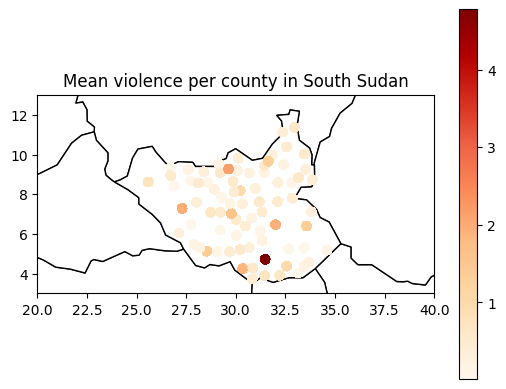

In [11]:
# Plot map of south sudan
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world

ax = world.plot(color="white", edgecolor="black") # Plot world map

# Bound map to south sudan
ax.set_xlim(20, 40)
ax.set_ylim(3, 13)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["centx"], df["centy"])) # Initialize GeoDataFrame

# Calculate mean ipc per administration
mean_violence = (
    df.reset_index()[["count_violence", "district"]]
    .groupby("district")
    .mean()
    .rename(columns={"count_violence": "mean_violence"})
)

# Plot mean ipc per administration on map
gdf.merge(mean_violence, on="district").plot(
    column="mean_violence", ax=ax, legend=True, cmap="OrRd"
)

# Set plot title
ax.set_title("Mean violence per county in South Sudan")

C:\Users\20202182\AppData\Local\Temp\ipykernel_19084\2777993968.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


Text(0.5, 1.0, 'Mean ndvi per county in South Sudan')

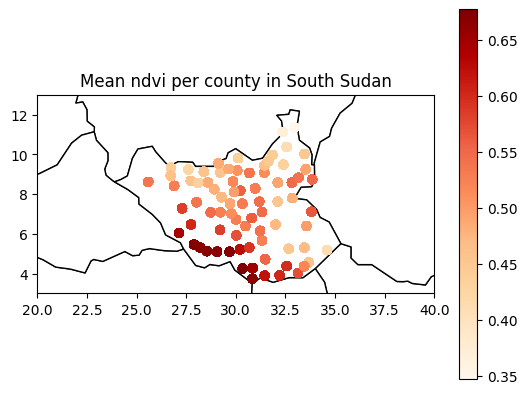

In [20]:
# Plot map of south sudan
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world

ax = world.plot(color="white", edgecolor="black") # Plot world map

# Bound map to south sudan
ax.set_xlim(20, 40)
ax.set_ylim(3, 13)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["centx"], df["centy"])) # Initialize GeoDataFrame

# Calculate mean ipc per administration
ndvi = (
    df.reset_index()[["ndvi_mean", "district"]]
    .groupby("district")
    .mean()
    .rename(columns={"ndvi_mean": "ndvi"})
)

# Plot mean ipc per administration on map
gdf.merge(ndvi, on="district").plot(
    column="ndvi", ax=ax, legend=True, cmap="OrRd"
)

# Set plot title
ax.set_title("Mean ndvi per county in South Sudan")

C:\Users\20202182\AppData\Local\Temp\ipykernel_19084\4062034692.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


Text(0.5, 1.0, 'Mean rain per county in South Sudan')

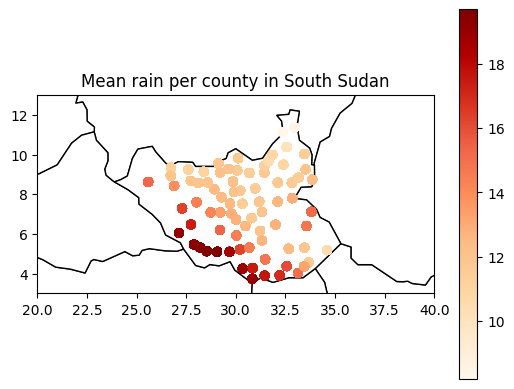

In [21]:
# Plot map of south sudan
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world

ax = world.plot(color="white", edgecolor="black") # Plot world map

# Bound map to south sudan
ax.set_xlim(20, 40)
ax.set_ylim(3, 13)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["centx"], df["centy"])) # Initialize GeoDataFrame

# Calculate mean ipc per administration
rain = (
    df.reset_index()[["rain_mean", "district"]]
    .groupby("district")
    .mean()
    .rename(columns={"rain_mean": "rain"})
)

# Plot mean ipc per administration on map
gdf.merge(rain, on="district").plot(
    column="rain", ax=ax, legend=True, cmap="OrRd"
)

# Set plot title
ax.set_title("Mean rain per county in South Sudan")

C:\Users\20202182\AppData\Local\Temp\ipykernel_19084\236102035.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


Text(0.5, 1.0, 'Mean et per county in South Sudan')

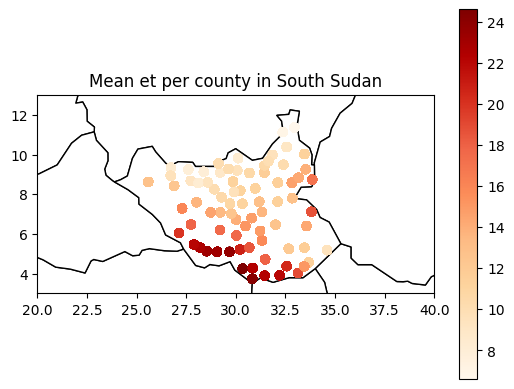

In [23]:
# Plot map of south sudan
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world

ax = world.plot(color="white", edgecolor="black") # Plot world map

# Bound map to south sudan
ax.set_xlim(20, 40)
ax.set_ylim(3, 13)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["centx"], df["centy"])) # Initialize GeoDataFrame

# Calculate mean ipc per administration
et = (
    df.reset_index()[["et_mean", "district"]]
    .groupby("district")
    .mean()
    .rename(columns={"et_mean": "et"})
)

# Plot mean ipc per administration on map
gdf.merge(et, on="district").plot(
    column="et", ax=ax, legend=True, cmap="OrRd"
)

# Set plot title
ax.set_title("Mean et per county in South Sudan")

C:\Users\20202182\AppData\Local\Temp\ipykernel_19084\1130760897.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


Text(0.5, 1.0, 'Mean violence per county in South Sudan (North)')

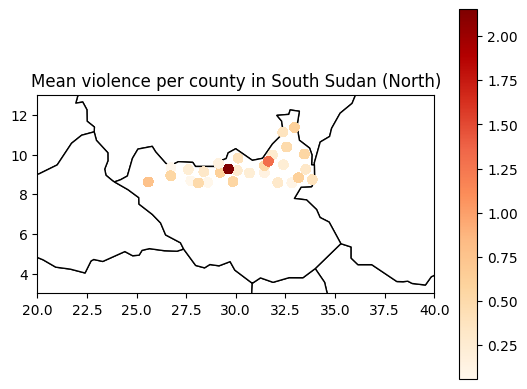

In [26]:
north = df[(df["centy"] > 8.5)]

# Plot map of south sudan
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world

ax = world.plot(color="white", edgecolor="black") # Plot world map

# Bound map to south sudan
ax.set_xlim(20, 40)
ax.set_ylim(3, 13)

gdf = gpd.GeoDataFrame(north, geometry=gpd.points_from_xy(north["centx"], north["centy"])) # Initialize GeoDataFrame

# Calculate mean ipc per administration
mean_violence = (
    north.reset_index()[["count_violence", "district"]]
    .groupby("district")
    .mean()
    .rename(columns={"count_violence": "mean_violence"})
)

# Plot mean ipc per administration on map
gdf.merge(mean_violence, on="district").plot(
    column="mean_violence", ax=ax, legend=True, cmap="OrRd"
)

# Set plot title
ax.set_title("Mean violence per county in South Sudan (North)")


In [34]:
mean_violence2 = mean_violence.loc[["Gogrial East", "Koch", "Rubkona"]]
mean_violence2

,mean_violence
district,
Gogrial East,0.069620
Koch,0.550633
Rubkona,2.151899


C:\Users\20202182\AppData\Local\Temp\ipykernel_19084\1588239301.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


Text(0.5, 1.0, 'Chosen regions')

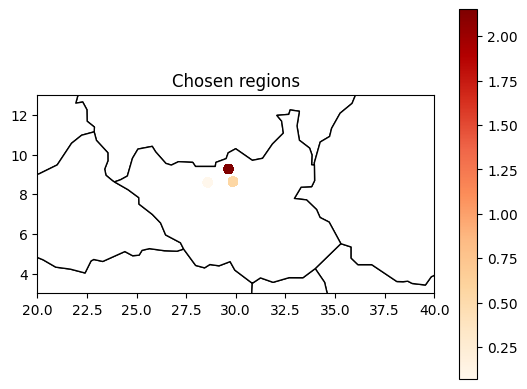

In [36]:
# Plot map of south sudan
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world

ax = world.plot(color="white", edgecolor="black") # Plot world map

# Bound map to south sudan
ax.set_xlim(20, 40)
ax.set_ylim(3, 13)

gdf = gpd.GeoDataFrame(north, geometry=gpd.points_from_xy(north["centx"], north["centy"])) # Initialize GeoDataFrame

# Plot mean ipc per administration on map
gdf.merge(mean_violence2, on="district").plot(
    column="mean_violence", ax=ax, legend=True, cmap="OrRd"
)

# Set plot title
ax.set_title("Chosen regions")